## Getting Market GeoLocation

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import geopandas
import pandas as pd
import pycountry 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

#### API login


In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [4]:
def get_geolocation(symbol, group):      

    group_dct = {
        'peers':te.getMarketsPeers,
        'components':te.getMarketsComponents
    }

    df = group_dct[group](symbols=symbol, output_type = 'df')
    df[['Symbol','Name', 'Country']]
    df4 = df.groupby('Country')['Country'].agg(['count'])
    df4
    df5 = pd.DataFrame()
    df5['Country'] =df4['count'].keys()
    df5['Companies'] = df4['count'].values
    df5

    countriesWithoutISO = []

    missing_countries = {
        'Bolivia' : 'Bolivia, Plurinational State of',
    'Cape Verde' : 'Cabo Verde',
    'Cayman Islands      '  : 'Cayman Islands',   
    'Czech Republic' : 'Czechia',
    'European Union' : 'European Union',
    "Ivory Coast" : "Côte d'Ivoire",
    'Laos' : "Lao People's Democratic Republic",
    'Macau' : 'Macao',
    'Macedonia' : 'North Macedonia',
    'Moldova' : 'Moldova, Republic of',
    'Norway              '   : 'Norway',            
    'Republic of the Congo' : 'Congo, The Democratic Republic of the',
    'Russia' : 'Russian Federation',
    'Singapore           '  : 'Singapore',          
    'South Korea' : 'Korea, Republic of',
    'St Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
    'Swaziland' : 'Eswatini',
    'Sweden              ' : 'Sweden',              
    'Taiwan' : 'Taiwan, Province of China',
    'Tanzania' : 'Tanzania, United Republic of',
    'Turkey ': 'Turkey', 
    'Venezuela' : 'Venezuela, Bolivarian Republic of',
    'Vietnam' : 'Viet Nam',
    'United States ': 'United States',
    'Brunei': 'Brunei Darussalam',
        'East Timor': 'Timor-Leste',
        'Guinea Bissau': 'Guinea-Bissau',
        'Iran': 'Iran, Islamic Republic of',
        'North Korea': "Korea, Democratic People's Republic of",
        'Palestine': "Palestine, State of",
        'St Kitts and Nevis': 'Saint Kitts and Nevis',
        'St Lucia': 'Saint Lucia',
        'St Vincent And The Grenadines': 'Saint Vincent and the Grenadines'
    }

    def get_iso3(country_full_name):
                """
                    returns country symbol iso alpha 3 format 
                """
                symbol = None
                iso = pycountry.countries.get(name=country_full_name)
                if iso != None:
                    symbol = iso.alpha_3
                else:
                    if country_full_name not in countriesWithoutISO:
                        countriesWithoutISO.append(country_full_name)
                        print('Failed to get ISO for: ' + country_full_name)
                return symbol

    iso3_countries_names = []
    corrected_countries_names_list = df5['Country'].replace(missing_countries)   
    df_corrected_countries_names = pd.DataFrame(corrected_countries_names_list)
    df_corrected_countries_names['Companies'] = df5['Companies']

    for item in df_corrected_countries_names['Country']:
        iso3_countries_names.append(get_iso3(item))

    df_corrected_countries_names['iso3'] = iso3_countries_names


    country_companies = df_corrected_countries_names[['Companies','iso3']]
    country_companies = country_companies.rename(columns={"iso3":"iso_a3"})


    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    country_shapes = world[['geometry', 'iso_a3']]


    country_shapes = country_shapes.merge(country_companies, on='iso_a3', how='outer')

    fig, ax = plt.subplots(1, 1, figsize=(20,10))

    country_shapes.plot(column='Companies',
               ax=ax,
               legend=True,
               legend_kwds={'label': "Companies per country",
                            'orientation': "vertical"},
                missing_kwds={'color': 'lightgrey'},
                       )




## Example for Peer Group



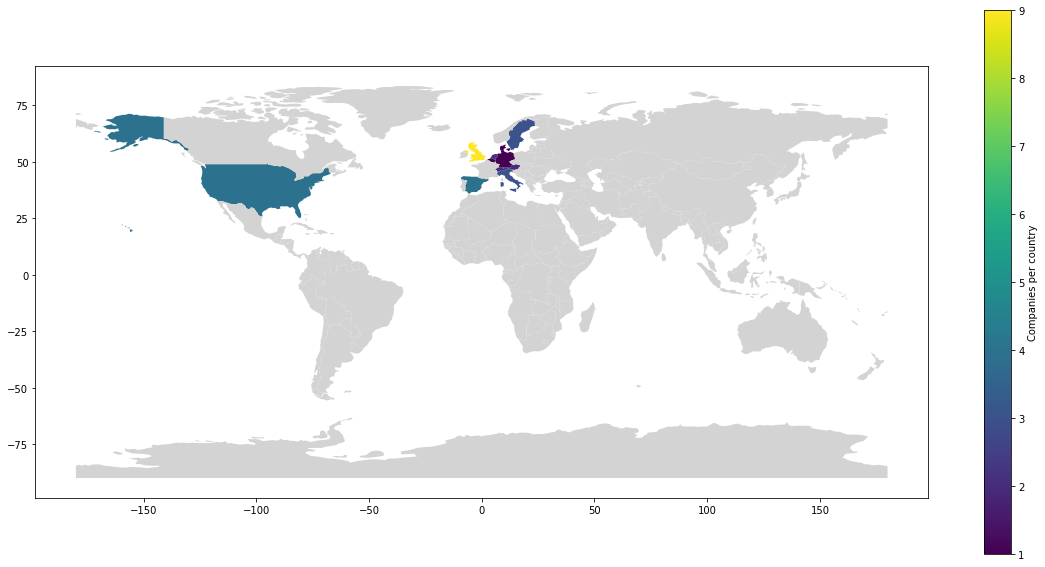

In [5]:
get_geolocation(symbol='hsba:ln', group='peers')

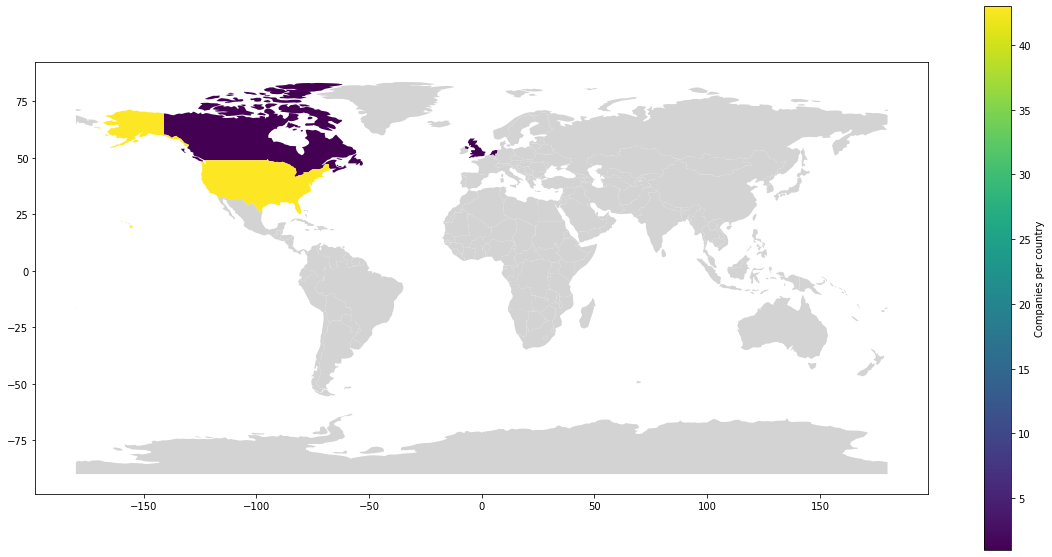

In [6]:
get_geolocation(symbol='wmt:us', group='peers')

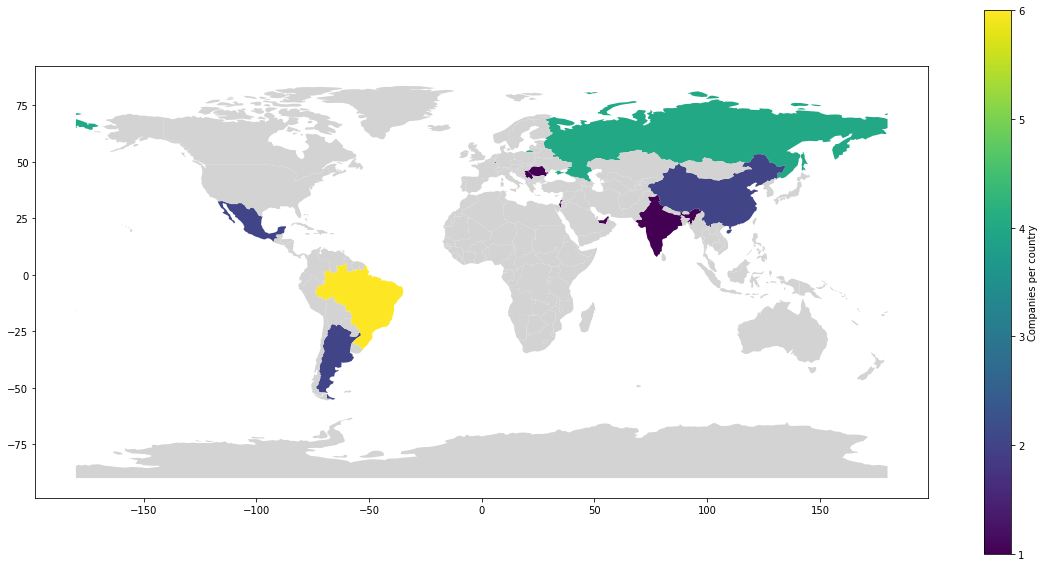

In [7]:
get_geolocation(symbol='PETR3:bs', group='peers')

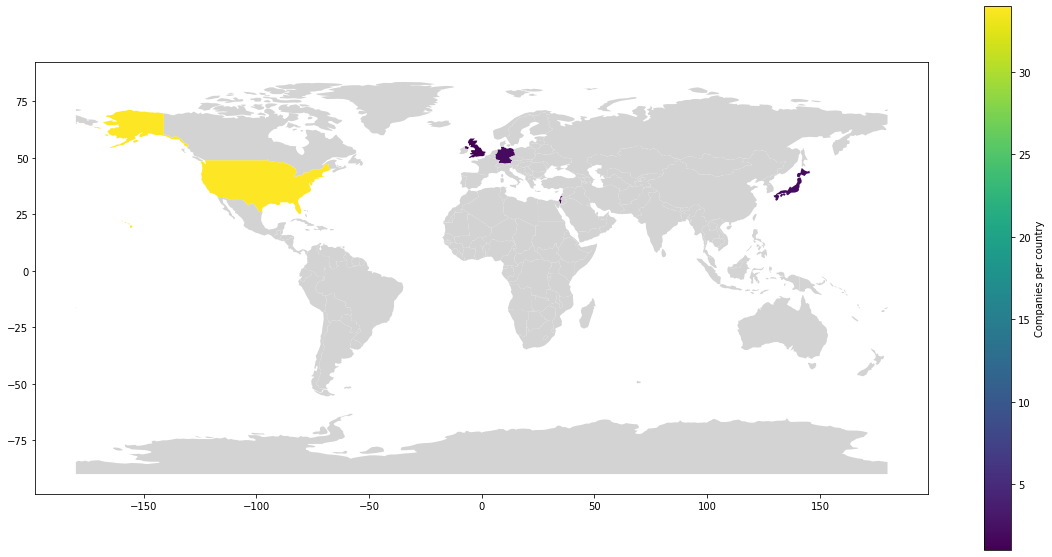

In [8]:
get_geolocation(symbol='MSFT:us', group='peers')

## Example for Component Group


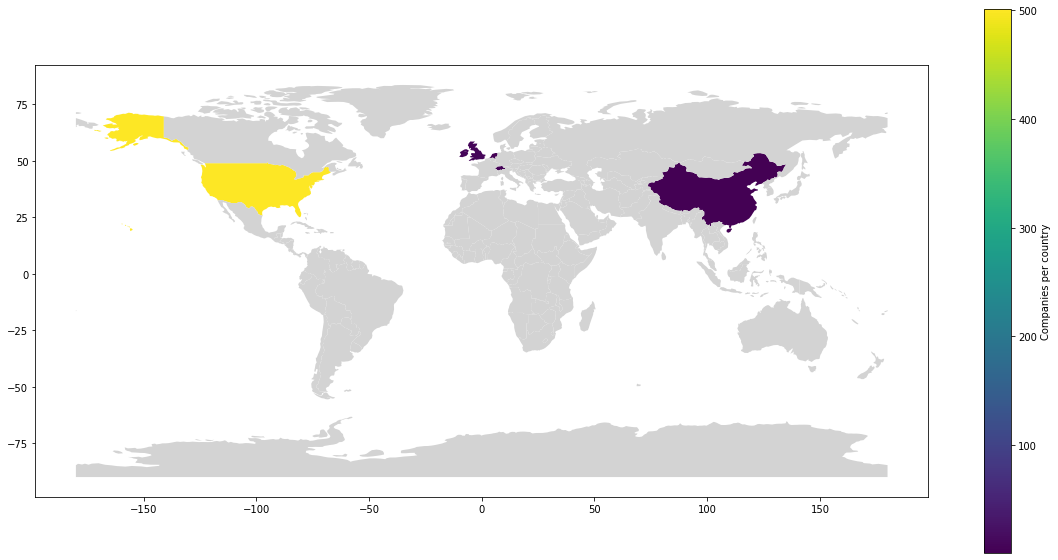

In [9]:
get_geolocation(symbol='SPX:IND', group='components')

Failed to get ISO for: Euro Area


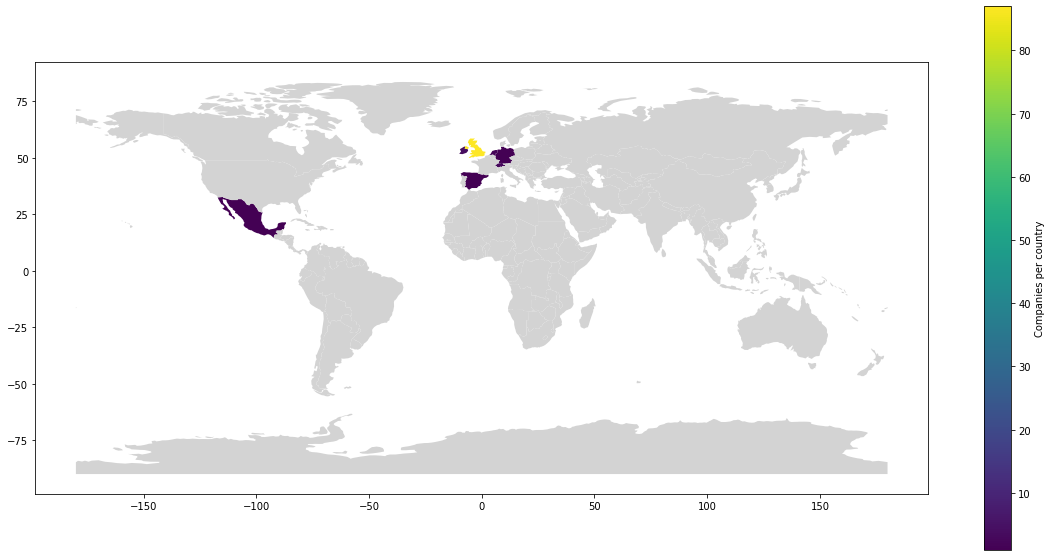

In [10]:
get_geolocation(symbol='UKX:IND', group='components')

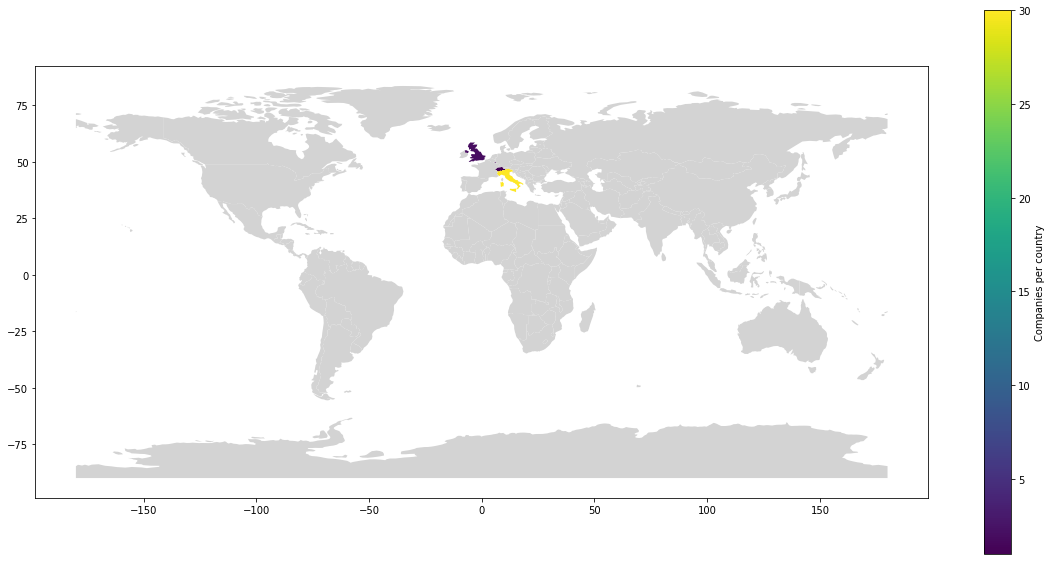

In [11]:
get_geolocation(symbol='FTSEMIB:IND', group='components')